In [2]:
# Реализую произвольную m,n, верхнетреугольную и симметричную. Остальное на вас - вам нужно дописать функцию.
# Не забудьте откомментировать ваши изменения в документации к функции!

import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 0):
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric", "diag", "lower_triangular", "symmetric", "degenerate", "step", "perturbed" и т.д.
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","upper_triangular","symmetric","diag","lower_triangular","degenerate","step","perturbed"
    """

    A = None

    if type_ == "full":
        A = np.random.random(size=(rows, columns))

    elif type_ == "upper_triangular":
        A = np.random.random(size=(rows, columns))
        for i in range(rows):
            for j in range(columns):
                if (i > j):
                    A[i, j] = 0

    elif type_ == "lower_triangular":
        A = np.random.random(size=(rows, columns))
        for i in range(rows):
            for j in range(columns):
                if (i < j):
                    A[i, j] = 0

    elif type_ == "diag":
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        else:
            A = np.zeros((rows, columns))
            np.fill_diagonal(A, np.random.random(size=rows))

    elif type_ == "symmetric":
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        else:
            A = np.random.random(size=(rows, columns))
            A = (A + A.T) / 2

    elif type_ == "degenerate":
        # Вырожденная матрица: ранг < min(rows, columns)
        if rows < 2 or columns < 2:
            return f"Error with type {type_} and shape ({rows},{columns})"
        else:
            A = np.random.random((rows, 1)) @ np.random.random((1, columns))

    elif type_ == "step":
        # Ступенчатая матрица n x n ранга m (m < n)
        n = rows
        m = int(eps) if eps > 0 else min(rows, columns) // 2
        if n != columns or m > n:
            return f"Error with type {type_} and shape ({rows},{columns})"
        A = np.zeros((n, n))
        for i in range(m):
            A[i, :i+1] = np.random.random(i+1)

    elif type_ == "perturbed":
        # Матрица возмущений n x m, элементы <= eps по модулю
        A = np.random.uniform(-abs(eps), abs(eps), (rows, columns))

    else:
        return f"Error with type {type_} and shape ({rows},{columns})"

    return A

print(matrix_generate(1, 3))
print(matrix_generate(4, 4, type_ = "upper_triangular"))
print(matrix_generate(4, 3, type_ = "upper_triangular"))
print(matrix_generate(4, 4, type_ = "symmetric"))
print(matrix_generate(4, 1, type_ = "symmetric"))

[[0.84161059 0.56206642 0.96740827]]
[[0.16419351 0.24406183 0.96696495 0.8211718 ]
 [0.         0.97174173 0.22755348 0.31263503]
 [0.         0.         0.73028737 0.17118493]
 [0.         0.         0.         0.9713205 ]]
[[0.96806313 0.22653398 0.63432469]
 [0.         0.03453579 0.12591538]
 [0.         0.         0.9130096 ]
 [0.         0.         0.        ]]
[[0.16429657 0.43393551 0.21192822 0.43482419]
 [0.43393551 0.25944702 0.559409   0.72151821]
 [0.21192822 0.559409   0.28275265 0.50156645]
 [0.43482419 0.72151821 0.50156645 0.49972837]]
Error with type symmetric and shape (4,1)


In [3]:
from scipy.linalg import eigvals

def vector_norm(x, norm_type='l2'):
    """Вычисляет норму вектора."""
    x = np.asarray(x)
    
    if norm_type == 'l1':
        return np.sum(np.abs(x))
    elif norm_type == 'l2':
        return np.sqrt(np.sum(x**2))
    elif norm_type == 'max':
        return np.max(np.abs(x))
    else:
        raise ValueError("Используйте 'l1', 'l2' или 'max'")
l1_norm = lambda x: vector_norm(x,"l1")
l2_norm = lambda x: vector_norm(x, "l2")
max_norm = lambda x: vector_norm(x, "max")

def matrix_norm(A, norm_type='l2'):
    """Вычисляет подчиненную матричную норму."""
    A = np.asarray(A)
    
    if norm_type == 'l1':
        return np.max(np.sum(np.abs(A), axis=0))
    elif norm_type == 'max':
        return np.max(np.sum(np.abs(A), axis=1))
    elif norm_type == 'l2':
        A_T_A = np.dot(A.T, A)
        eigenvalues = np.real(eigvals(A_T_A))
        return np.sqrt(np.max(eigenvalues))
    else:
        raise ValueError("Используйте 'l1', 'l2' или 'max'")

matrix_l1_norm = lambda A: matrix_norm(A, "l1")
matrix_l2_norm = lambda A: matrix_norm(A, "l2")
matrix_max_norm = lambda A: matrix_norm(A, "max")

def condition_number(A, norm_type='l2'):
    """Вычисляет число обусловленности матрицы."""
    A = np.asarray(A)
    
    if A.shape[0] != A.shape[1]:
        raise ValueError("Матрица должна быть квадратной")
    
    if np.linalg.det(A) == 0:
        raise ValueError("Матрица вырожденная")
    
    A_inv = np.linalg.inv(A)
    return matrix_norm(A, norm_type) * matrix_norm(A_inv, norm_type)

condition_l1 = lambda A: condition_number(A, "l1")
condition_l2 = lambda A: condition_number(A, "l2")
condition_max = lambda A: condition_number(A, "max")

# Упражнение 3
$C_1 = \frac{1}{\sqrt{n}}, C_2 = {\sqrt{n}}$

# упражнение 4
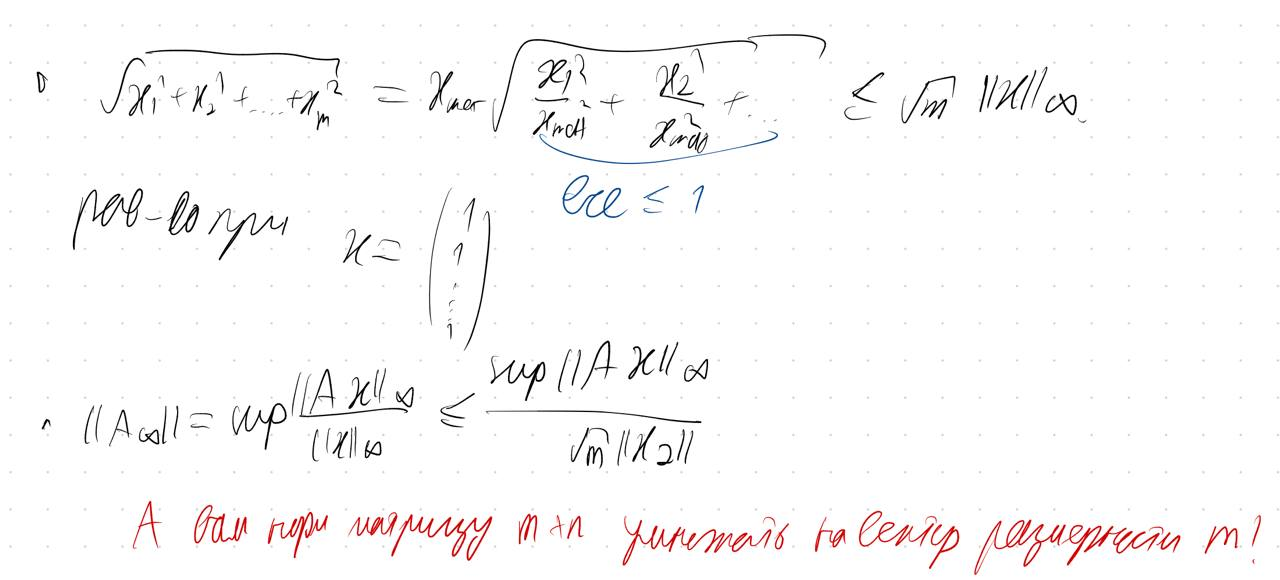

# упражнение 5
U просто поворачивает столбцы/строки A и поэтому не меняет сумму их длин 